<a href="https://colab.research.google.com/github/anaisabelveg/tfm/blob/main/Codigo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> ********************* OBTENCION DE LOS DATOS *********************</h1>

<h1>En este codigo voy a crear un dataframe con los vehiculos del dataset elegido.</h1>
<h2>Quiero obtener la mayor informacion posible y a partir de ahi elegir en torno a 400 registros que son los que utilizaré para llevar a cabo el análisis de predicción de precios</h2>

<p>Importo el modulo pandas</p>

In [ ]:
import pandas as pd

<p>Creo el dataframe a partir del dataset vehicles.csv</p>

In [ ]:
dfVehicles = pd.read_csv("vehicles.csv")
print(dfVehicles.head(10))

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5  7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6  7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7  7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8  7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9  7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   

                   region                           region_url  price  year  \
0                prescott      https://prescott.craigslist.org   6000   NaN   
1            fayetteville         https://fayar.craigslist.org  11900   NaN   
2            f

<p>Muestro la informacion del dataframe creado</p>

In [ ]:
print(dfVehicles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

<p>Elimino la columna county que fue dejada por error y no contiene datos</p>

In [ ]:
dfVehicles = dfVehicles.drop(['county'], axis=1)

In [ ]:
dfVehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

<h1>Eleccion del modelo de coche para realizar análisis por regresión</h1>
<h2>Se nos pide que sean aproximadamente 400 registros, veo cuales son los modelos que tienen aproximadamente esos registros</h2>

In [ ]:
dfVehicles['model'].value_counts().head(150)

f-150               8009
silverado 1500      5140
1500                4211
camry               3135
silverado           3023
                    ... 
m-class              432
accent               432
transit              430
avalon               429
super duty f-250     424
Name: model, Length: 150, dtype: int64

<h3>Compruebo los datos que tiene el modelo transit</h3>

In [ ]:
dfVehicles[dfVehicles['model']=='transit']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
735,7311701072,https://bham.craigslist.org/ctd/d/white-house-...,birmingham,https://bham.craigslist.org,31900,2019.0,ford,transit,like new,6 cylinders,...,rwd,mid-size,van,white,https://images.craigslist.org/00B0B_9WcrcgFCRw...,-See more vans at valuecargovans.com Price: $3...,al,36.464100,-86.658280,2021-04-23T21:11:04-0500
737,7311701079,https://bham.craigslist.org/ctd/d/white-house-...,birmingham,https://bham.craigslist.org,32900,2019.0,ford,transit,like new,6 cylinders,...,rwd,full-size,van,white,https://images.craigslist.org/00202_bCYziGmZE9...,-See more vans at valuecargovans.com Price: $3...,al,36.464100,-86.658280,2021-04-23T21:11:04-0500
1300,7306854164,https://bham.craigslist.org/ctd/d/white-house-...,birmingham,https://bham.craigslist.org,34500,2019.0,ford,transit,like new,6 cylinders,...,rwd,full-size,van,white,https://images.craigslist.org/00z0z_3DlareG5Ug...,-See more vans at valuecargovans.com Price: $3...,al,36.464100,-86.658280,2021-04-14T14:59:22-0500
1302,7306854137,https://bham.craigslist.org/ctd/d/white-house-...,birmingham,https://bham.craigslist.org,32700,2019.0,ford,transit,like new,6 cylinders,...,rwd,full-size,van,white,https://images.craigslist.org/00u0u_5JeAcbCxrY...,-See more vans at valuecargovans.com Price: $3...,al,36.464100,-86.658280,2021-04-14T14:59:20-0500
1303,7306854140,https://bham.craigslist.org/ctd/d/white-house-...,birmingham,https://bham.craigslist.org,32900,2019.0,ford,transit,like new,6 cylinders,...,rwd,full-size,van,white,https://images.craigslist.org/00202_bCYziGmZE9...,-See more vans at valuecargovans.com Price: $3...,al,36.464100,-86.658280,2021-04-14T14:59:20-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421277,7307405451,https://madison.craigslist.org/ctd/d/new-glaru...,madison,https://madison.craigslist.org,12994,2015.0,ford,transit,like new,4 cylinders,...,fwd,mid-size,van,silver,https://images.craigslist.org/00Z0Z_hJH24s6GL8...,"2.5L 4 Cyl, automatic, 3rd row seating! Hard t...",wi,42.822477,-89.630070,2021-04-15T15:57:27-0500
421403,7306635047,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,999,2019.0,ford,transit,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00202_gz8uWcgeQ1...,2019 Ford Transit Glaval Commute with Rear Lug...,wi,43.076900,-89.409400,2021-04-14T09:10:22-0500
424318,7310043687,https://milwaukee.craigslist.org/ctd/d/waukega...,milwaukee,https://milwaukee.craigslist.org,16999,2018.0,ford,transit,NaN,6 cylinders,...,NaN,NaN,van,white,https://images.craigslist.org/00w0w_khMQM1GWbM...,STOCK # WYC-A35352 VEHICLE DESCRIPTION: 1-OWN...,wi,42.354200,-87.865100,2021-04-20T16:20:33-0500
425607,7316473540,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,24972,2015.0,ford,transit,excellent,6 cylinders,...,rwd,full-size,truck,white,https://images.craigslist.org/00o0o_l8lszpRl1Z...,2015 Ford Transit T-350 HD Dual Rear Wheel 3.7...,wi,44.408989,-89.880867,2021-05-03T17:29:58-0500


<h2>Voy a crear el dataframe con los registros del modelo transit</h2>

In [ ]:
dfTransit = dfVehicles[dfVehicles['model']=='transit']

In [ ]:
dfTransit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 735 to 426400
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            430 non-null    int64  
 1   url           430 non-null    object 
 2   region        430 non-null    object 
 3   region_url    430 non-null    object 
 4   price         430 non-null    int64  
 5   year          430 non-null    float64
 6   manufacturer  430 non-null    object 
 7   model         430 non-null    object 
 8   condition     272 non-null    object 
 9   cylinders     234 non-null    object 
 10  fuel          430 non-null    object 
 11  odometer      423 non-null    float64
 12  title_status  430 non-null    object 
 13  transmission  428 non-null    object 
 14  VIN           372 non-null    object 
 15  drive         243 non-null    object 
 16  size          216 non-null    object 
 17  type          370 non-null    object 
 18  paint_color   390 non-nul

<h3>Guardo el dataset creado con formato excel y csv</h3>

In [ ]:
dfTransit.to_excel("transit.xlsx", index=False)

In [ ]:
dfTransit.to_csv("transit.csv", index=False)

<h3>Muestro estadisticos de las variables cuantitativas</h3>

In [ ]:
dfTransit.describe()

,id,price,year,odometer,lat,long
count,4.300000e+02,430.000000,430.000000,423.000000,430.000000,430.000000
mean,7.311160e+09,23698.332558,2017.655814,54713.401891,36.894081,-91.494635
std,4.240606e+06,13173.357586,1.907573,43872.308218,5.210963,16.657919
min,7.301595e+09,0.000000,2010.000000,0.000000,19.644813,-156.451540
25%,7.307441e+09,17995.000000,2016.000000,21990.500000,33.711509,-95.555175
50%,7.311704e+09,26495.000000,2018.500000,35005.000000,36.464100,-86.658280
75%,7.314813e+09,32900.000000,2019.000000,84250.000000,40.382993,-81.310382
max,7.317002e+09,84900.000000,2020.000000,210000.000000,61.218268,-70.345700


<h3>Dibujo los histagramas de dichas variables para que me ayude a interpretar que datos tengo</h3>

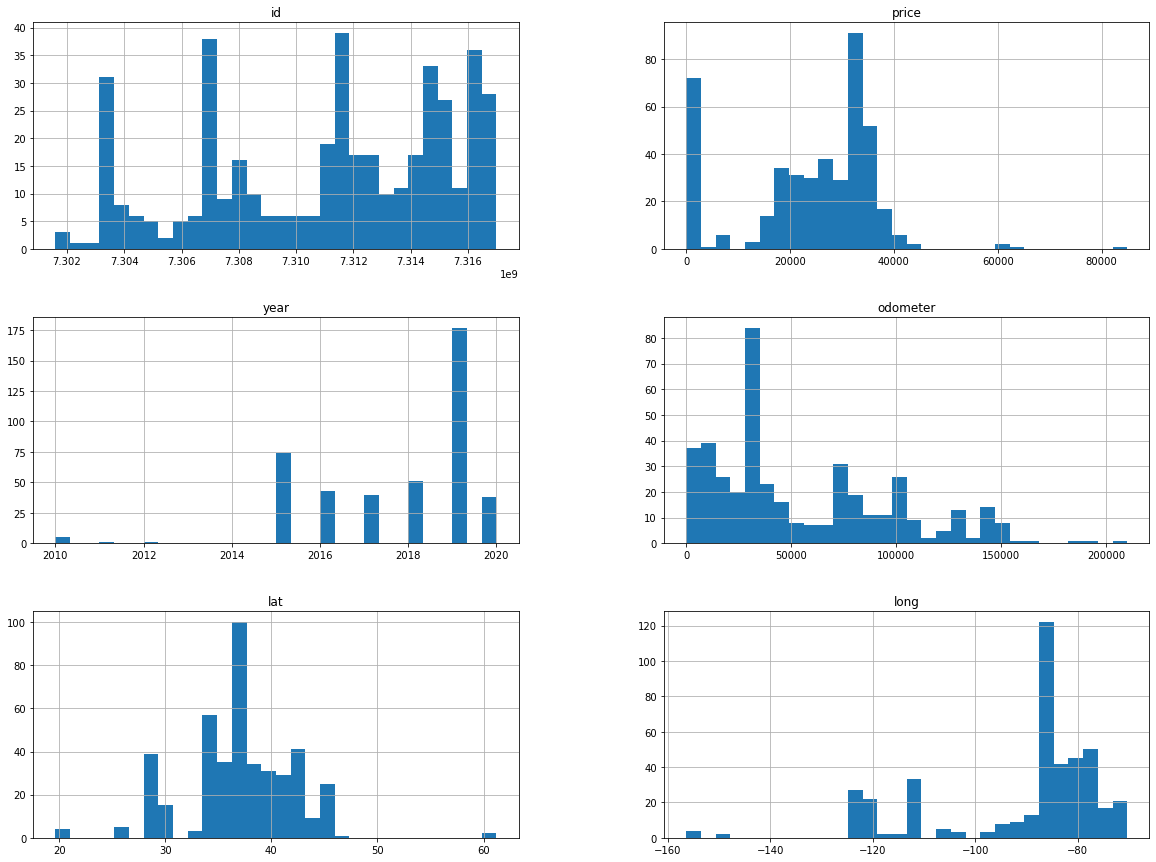

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
dfTransit.hist(bins=30, figsize=(20,15))
plt.show()

<h2>La variable objetivo, o variable dependiente es el valor a predecir. Muestro como se relacciona con el año de matriculacion y las millas recorridas por el vehiculo. Ambas caracteristicas deberian tener una relacción.</h2>

<AxesSubplot:xlabel='year', ylabel='price'>

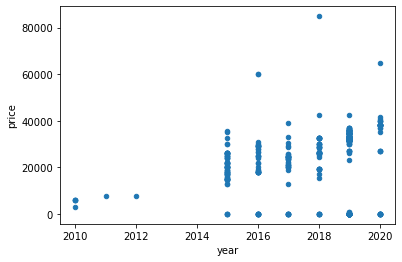

In [ ]:
dfTransit.plot(kind="scatter", x="year", y="price")

<AxesSubplot:xlabel='odometer', ylabel='price'>

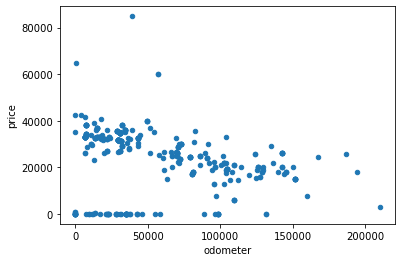

In [ ]:
dfTransit.plot(kind="scatter", x="odometer", y="price")

<h2>Estadísticos de la variable objetivo</h2>

In [ ]:
print("count:", dfTransit['price'].count())
print("mean:", dfTransit['price'].mean())
print("median:", dfTransit['price'].median())
print("mode:", dfTransit['price'].mode())
print("std:", dfTransit['price'].std())
print("min:", dfTransit['price'].min())
print("max:", dfTransit['price'].max())

count: 430
mean: 23698.332558139537
median: 26495.0
mode: 0    0
dtype: int64
std: 13173.357586479942
min: 0
max: 84900


<h2>Histograma de la variable objetivo</h2>

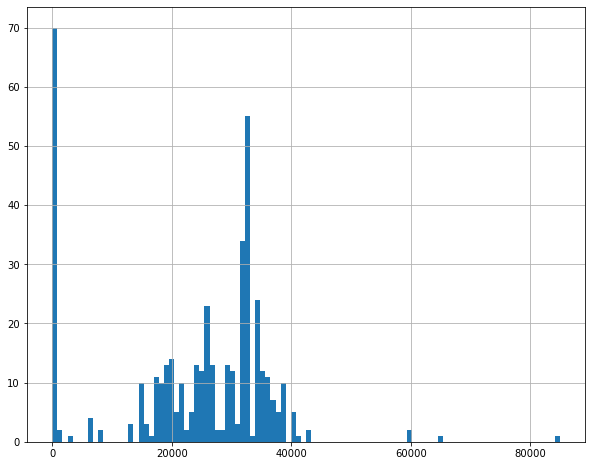

In [ ]:
dfTransit['price'].hist(bins=100, figsize=(10,8))
plt.show()

<h2>Curva de densidad de la variable objetivo</h2>

<AxesSubplot:ylabel='Density'>

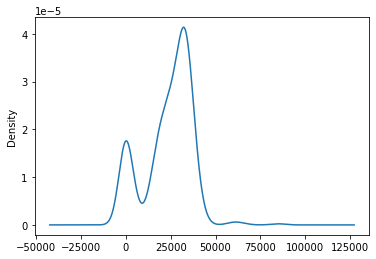

In [ ]:
dfTransit['price'].plot(kind="density")

<h2>Matriz de correlación de las caracteristicas del dataset</h2>

In [ ]:
matriz_correlacion = dfTransit.corr()
matriz_correlacion

,id,price,year,odometer,lat,long
id,1.000000,-0.214531,-0.205298,0.275361,-0.161587,-0.113141
price,-0.214531,1.000000,0.280313,-0.252330,0.192601,-0.181801
year,-0.205298,0.280313,1.000000,-0.714767,-0.100108,0.099443
odometer,0.275361,-0.252330,-0.714767,1.000000,-0.047529,0.105104
lat,-0.161587,0.192601,-0.100108,-0.047529,1.000000,-0.127966
long,-0.113141,-0.181801,0.099443,0.105104,-0.127966,1.000000


<h2>Mapa de calor para ver la relacción entre las variables</h2>

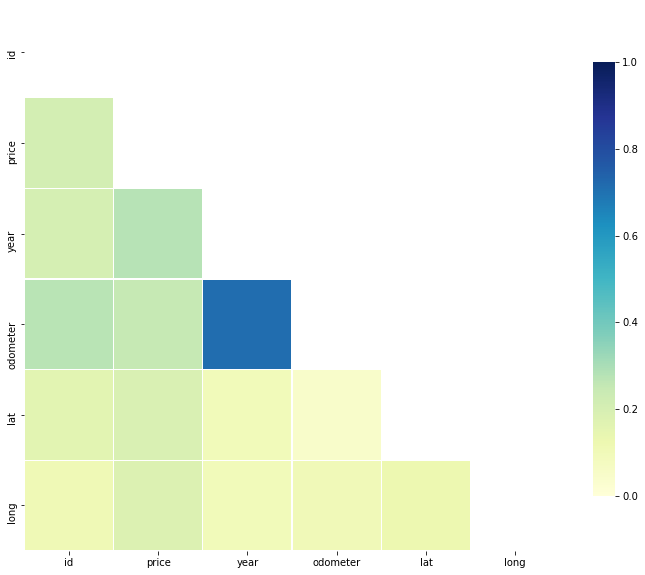

In [ ]:
import numpy as np
import seaborn as sns

#corr = np.abs(dfTransit.drop(['price'], axis=1).corr())
corr = np.abs(dfTransit.corr())
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, mask=mask, vmin = 0.0, vmax=1.0, center=0.5,
           linewidths=.1,cmap='YlGnBu', cbar_kws={"shrink": .8})
plt.show()

<h2>Distribucción y relacción de las variables</h2>

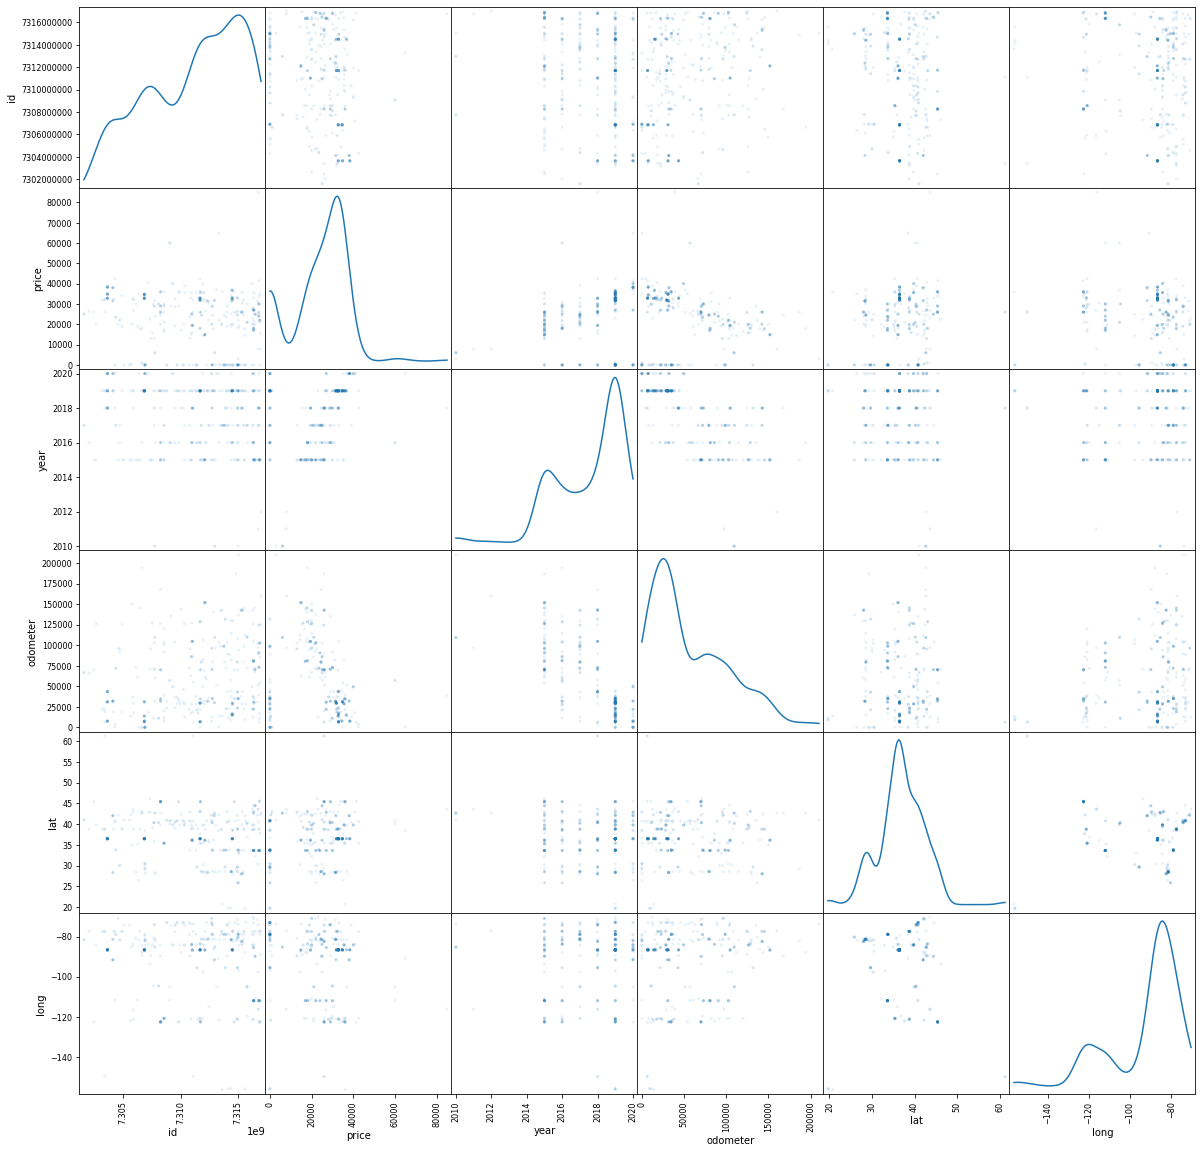

In [ ]:
pd.plotting.scatter_matrix(dfTransit, alpha=0.1, figsize=(20,20),diagonal='kde')
plt.show()

<h1> ********************* EDA (Análisis exploratorio de datos) *********************</h1>

<h2>Elimino las características que no aportan valor al estudio</h2>

In [ ]:
dfTransit = dfTransit.drop(['id','url','VIN','region_url','image_url','description',
                            'state','posting_date', 'manufacturer','model','size', 'type','paint_color', 'condition'], axis=1)
dfTransit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 735 to 426400
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        430 non-null    object 
 1   price         430 non-null    int64  
 2   year          430 non-null    float64
 3   cylinders     234 non-null    object 
 4   fuel          430 non-null    object 
 5   odometer      423 non-null    float64
 6   title_status  430 non-null    object 
 7   transmission  428 non-null    object 
 8   drive         243 non-null    object 
 9   lat           430 non-null    float64
 10  long          430 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 40.3+ KB


<h2>Borro registros con valor 0. Millas recorridas y precio</h2>

In [ ]:
odometer0 = dfTransit[dfTransit['odometer']==0].index
print(odometer0)
dfTransit = dfTransit.drop(odometer0)

Int64Index([206322, 421403], dtype='int64')


In [ ]:
precio0 = dfTransit[dfTransit['price']==0].index
print(precio0)
dfTransit = dfTransit.drop(precio0)

Int64Index([ 89987,  89990,  93108,  97814, 100566, 101513, 103360, 106374,
            107865, 113078, 113080, 113081, 116128, 122996, 125755, 126666,
            128564, 129785, 129917, 236831, 240210, 240745, 241265, 241402,
            241727, 243133, 243307, 244238, 252283, 258506, 272324, 272712,
            272909, 273494, 273495, 273634, 274047, 274118, 274313, 274314,
            274460, 274464, 274689, 274691, 344090, 344207, 344278, 345404,
            345501, 346890, 347083, 347331, 349367, 349429, 349490, 349542,
            364449, 364985, 366072, 371013, 376164, 380763, 381357, 382396,
            386299, 390144, 391887, 396164],
           dtype='int64')


<h2>A continuación, evalúo el contenido de las variables no numéricas (cualitativas) con el fin de estimar si es posible su transformación a variables numéricas (cuantitativas)</h2>

In [ ]:
dfTransit['region'].value_counts().head(150)

chattanooga             17
knoxville               16
orlando                 15
memphis                 13
huntsville / decatur    11
                        ..
kenosha-racine           1
harrisburg               1
northern michigan        1
rapid city / west SD     1
hawaii                   1
Name: region, Length: 109, dtype: int64

In [ ]:
dfTransit['cylinders'].value_counts().head(150)

6 cylinders    191
4 cylinders     13
5 cylinders      6
Name: cylinders, dtype: int64

In [ ]:
dfTransit['fuel'].value_counts().head(150)

gas       336
other      19
diesel      5
Name: fuel, dtype: int64

In [ ]:
dfTransit['title_status'].value_counts().head(150)

clean      336
rebuilt     19
salvage      5
Name: title_status, dtype: int64

In [ ]:
dfTransit['transmission'].value_counts().head(150)

automatic    352
other          5
manual         1
Name: transmission, dtype: int64

In [ ]:
dfTransit['drive'].value_counts().head(150)

rwd    201
fwd     14
4wd      1
Name: drive, dtype: int64

In [ ]:
dfTransit['lat'].value_counts().head(150)

36.464100    97
45.382346    22
38.762669    17
39.768070    15
36.107596    14
             ..
36.000800     1
42.379670     1
25.888195     1
42.946800     1
40.652615     1
Name: lat, Length: 94, dtype: int64

In [ ]:
dfTransit['long'].value_counts().head(150)

-86.658280     97
-122.605132    22
-77.461754     17
-84.194720     15
-86.743824     14
               ..
-73.202200      1
-111.662000     1
-156.451540     1
-105.088307     1
-86.269042      1
Name: long, Length: 95, dtype: int64

<h2>En el atributo fuel asignaremos: gas=1, diesel=2 y other=3</h2>

In [ ]:
def cambiar_fuel(data):
    if data == 'gas':
        return 1
    elif data == 'diesel':
        return 2
    else:
        return 3
dfTransit['fuel'] = dfTransit['fuel'].apply(cambiar_fuel)
dfTransit['fuel'].value_counts().head(150)

1    336
3     19
2      5
Name: fuel, dtype: int64

<h2>En el atributo title_status asignaremos: clean=1, rebuilt=2 y salvage=3</h2>

In [ ]:
def cambiar_title_status(data):
    if data == 'clean':
        return 1
    elif data == 'rebuilt':
        return 2
    else:
        return 3
dfTransit['title_status'] = dfTransit['title_status'].apply(cambiar_title_status)
dfTransit['title_status'].value_counts().head(150)

1    336
2     19
3      5
Name: title_status, dtype: int64

<h2>En el atributo transmission asignaremos: automatic=1, manual=2 y other=3</h2>

In [ ]:
def cambiar_transmission(data):
    if data == 'automatic':
        return 1
    elif data == 'manual':
        return 2
    else:
        return 3
dfTransit['transmission'] = dfTransit['transmission'].apply(cambiar_transmission)
dfTransit['transmission'].value_counts().head(150)

1    352
3      7
2      1
Name: transmission, dtype: int64

<h2>En el atributo drive asignaremos: rwd=1, fwd=2 y 4wd=3. Los valores nulos les pongo rwd=1 al ser mayoria</h2>

In [ ]:
def cambiar_drive(data):
    if data == 'rwd':
        return 1
    elif data == 'fwd':
        return 2
    elif data == '4wd':
        return 3
    else:
        return 1
dfTransit['drive'] = dfTransit['drive'].apply(cambiar_drive)
dfTransit['drive'].value_counts().head(150)

1    345
2     14
3      1
Name: drive, dtype: int64

<h2>En el atributo cylinders dejo solo el numero de cilindros y si no tiene valor asigno 6 al ser la mayoria</h2>

In [ ]:
def cambiar_cylinders(data):
    if data == '6 cylinders':
        return 6
    elif data == '5 cylinders':
        return 5
    elif data == '4 cylinders':
        return 4
    else:
        return 6
    
dfTransit['cylinders'] = dfTransit['cylinders'].apply(cambiar_cylinders)
dfTransit['cylinders'].value_counts().head(150)

6    341
4     13
5      6
Name: cylinders, dtype: int64

<h3>Compruebo que todas las caracetristicas salvo region son numéricas y sin valores nulos</h3>
<h3>Guardo el dataframe resultante en un excel</h3>

In [ ]:
dfTransit.info()
dfTransit.to_excel("transit_2.xlsx", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 735 to 426400
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        360 non-null    object 
 1   price         360 non-null    int64  
 2   year          360 non-null    float64
 3   cylinders     360 non-null    int64  
 4   fuel          360 non-null    int64  
 5   odometer      359 non-null    float64
 6   title_status  360 non-null    int64  
 7   transmission  360 non-null    int64  
 8   drive         360 non-null    int64  
 9   lat           360 non-null    float64
 10  long          360 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 33.8+ KB


<h2>Con los datos limpios y las nuevas caracteristicas modificadas, obtengo de nuevo la matriz de correlacción</h2>

In [ ]:
matriz_correlacion = dfTransit.corr()
matriz_correlacion

,price,year,cylinders,fuel,odometer,title_status,transmission,drive,lat,long
price,1.000000,0.676804,0.305339,0.002506,-0.671098,-0.171069,0.015230,-0.158749,0.017973,-0.043500
year,0.676804,1.000000,0.334267,0.042315,-0.715429,-0.038667,0.024606,-0.250025,-0.087432,0.104815
cylinders,0.305339,0.334267,1.000000,-0.018208,-0.138157,0.057323,-0.016852,-0.666377,-0.192533,0.094488
fuel,0.002506,0.042315,-0.018208,1.000000,0.098027,-0.065679,0.047597,-0.052770,-0.036643,0.162733
odometer,-0.671098,-0.715429,-0.138157,0.098027,1.000000,0.138091,0.022997,0.048772,-0.099440,0.143955
title_status,-0.171069,-0.038667,0.057323,-0.065679,0.138091,1.000000,-0.037463,-0.051193,0.110686,0.108499
transmission,0.015230,0.024606,-0.016852,0.047597,0.022997,-0.037463,1.000000,-0.030099,-0.036903,0.063528
drive,-0.158749,-0.250025,-0.666377,-0.052770,0.048772,-0.051193,-0.030099,1.000000,0.256945,-0.017662
lat,0.017973,-0.087432,-0.192533,-0.036643,-0.099440,0.110686,-0.036903,0.256945,1.000000,-0.255445
long,-0.043500,0.104815,0.094488,0.162733,0.143955,0.108499,0.063528,-0.017662,-0.255445,1.000000


<h2>Volvemos a mostrar la matríz de calor con las nuevas características numéricas</h2>

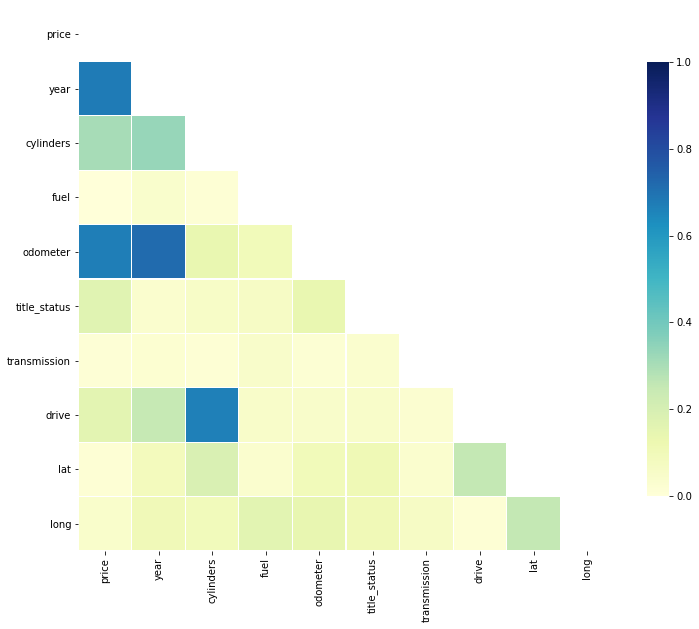

In [ ]:
import numpy as np
import seaborn as sns

corr = np.abs(dfTransit.drop(['price'], axis=1).corr())
corr = np.abs(dfTransit.corr())
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, mask=mask, vmin = 0.0, vmax=1.0, center=0.5,
           linewidths=.1,cmap='YlGnBu', cbar_kws={"shrink": .8})
plt.show()

<h2>Dibujamos boxplot de cada atributo para evaluar posibles outliers</h2>

<AxesSubplot:>

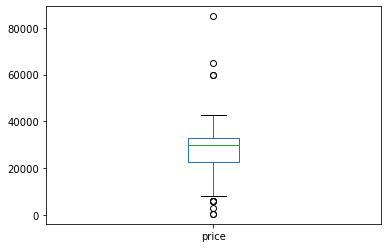

In [ ]:
dfTransit.boxplot(column =['price'], grid = False)

<AxesSubplot:>

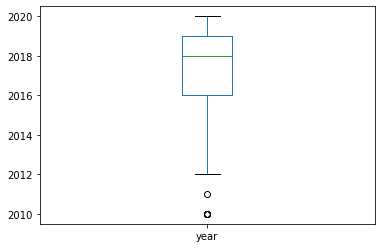

In [ ]:
dfTransit.boxplot(column =['year'], grid = False)

<AxesSubplot:>

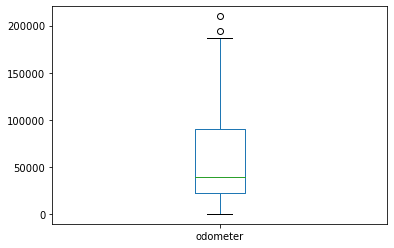

In [ ]:
dfTransit.boxplot(column =['odometer'], grid = False)

<AxesSubplot:>

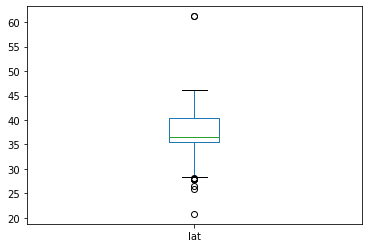

In [ ]:
dfTransit.boxplot(column =['lat'], grid = False)

<AxesSubplot:>

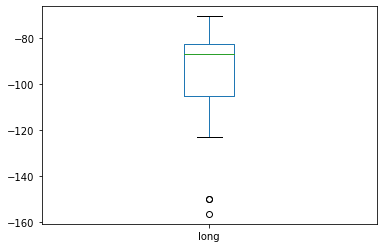

In [ ]:
dfTransit.boxplot(column =['long'], grid = False)

<AxesSubplot:>

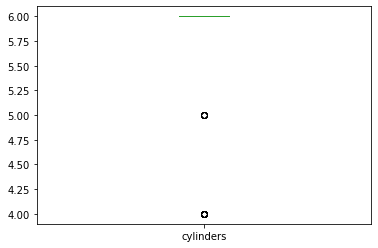

In [ ]:
dfTransit.boxplot(column =['cylinders'], grid = False)

<AxesSubplot:>

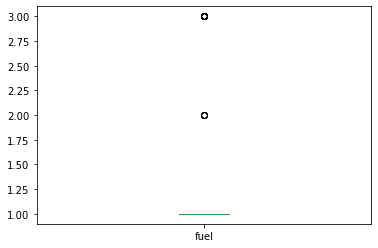

In [ ]:
dfTransit.boxplot(column =['fuel'], grid = False)

<AxesSubplot:>

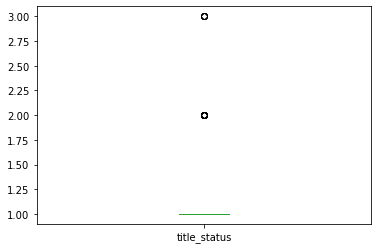

In [ ]:
dfTransit.boxplot(column =['title_status'], grid = False)

<AxesSubplot:>

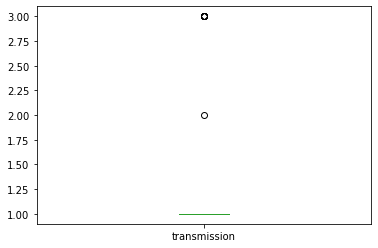

In [ ]:
dfTransit.boxplot(column =['transmission'], grid = False)

<AxesSubplot:>

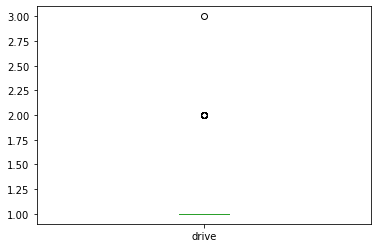

In [ ]:
dfTransit.boxplot(column =['drive'], grid = False)

<h2>Dibujo histograma y curva de densidad de cada atributo</h2>

/Users/anaisabelvegascaceres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


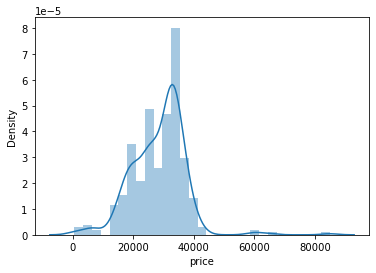

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
sns.distplot(a=dfTransit.price)
plt.show()

/Users/anaisabelvegascaceres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


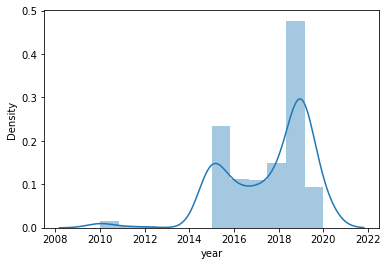

In [ ]:
sns.distplot(a=dfTransit.year)
plt.show()

/Users/anaisabelvegascaceres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


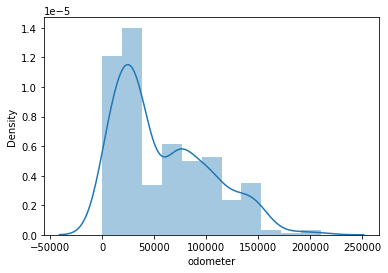

In [ ]:
sns.distplot(a=dfTransit.odometer)
plt.show()

/Users/anaisabelvegascaceres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


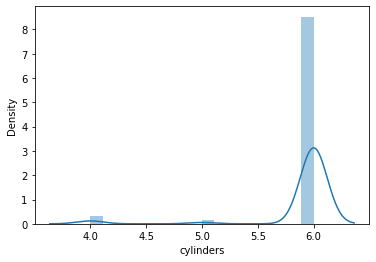

In [ ]:
sns.distplot(a=dfTransit.cylinders)
plt.show()

/Users/anaisabelvegascaceres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


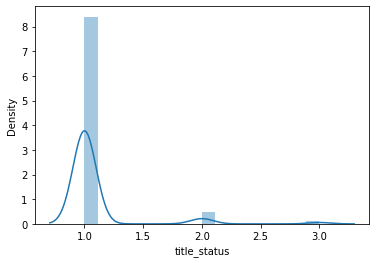

In [ ]:
sns.distplot(a=dfTransit.title_status)
plt.show()

/Users/anaisabelvegascaceres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


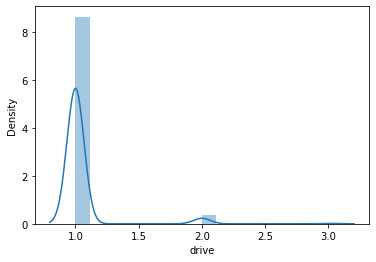

In [ ]:
sns.distplot(a=dfTransit.drive)
plt.show()